In [183]:
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling

import pandas as pd
import time
import datetime
from datetime import date

import matplotlib
import datetime as dt
import matplotlib.pylab as plt
import matplotlib.dates as mdates
from matplotlib import dates

from scipy import stats

%matplotlib inline 

## Загрузка данных

In [219]:
df = pd.read_csv(open('C:/Users/Дарья/VK/test_data.csv'))#Вставьте пожайлуста свой путь

In [185]:
df.shape

(122097, 10)

* time — время взаимодействия пользователя с рекламой в формате UnixTime;
* event — тип взаимодействия (click — клик на объявление, view — показ объявления, report — жалоба на объявление);
* ad_cost_type — тип трат рекламного объявления (CPM — траты за 1000 показов, CPC — траты за клик);
* has_video — наличие видео в объявлении (0 — нет, 1 — есть);
* agency_union_id — id рекламного агентства (если рекламный кабинет принадлежит физическому лицу, то ячейка будет заполнена значением 'no_agency');
* client_union_id — id рекламного клиента;
* campaign_union_id — id рекламной кампании;
* ad_id — id рекламного объявления;
* platform — платформа, с которой пользователь взаимодействовал с рекламой (web — веб-версия, mvk — мобильная версия, iphone — IOS-приложение, android — Android-приложение, wphone — Windows Phone-приложение).

In [186]:
df.head()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date
0,1.554744e+09,report,CPM,0,no_agency,client_21074,campaign_27489,ad_27489,android,2019-04-08
1,1.555103e+09,click,CPM,0,no_agency,client_22392,campaign_35893,ad_35893,android,2019-04-12
2,1.555403e+09,click,CPM,0,no_agency,client_16836,campaign_26799,ad_26804,web,2019-04-16
3,1.554822e+09,click,CPM,0,no_agency,client_22920,campaign_37146,ad_37146,android,2019-04-09
4,1.554967e+09,click,CPM,0,no_agency,client_645,campaign_15893,ad_15944,web,2019-04-11


In [187]:
df.count()/df.shape[0]

time                 1.0
event                1.0
ad_cost_type         1.0
has_video            1.0
agency_union_id      1.0
client_union_id      1.0
campaign_union_id    1.0
ad_id                1.0
platform             1.0
date                 1.0
dtype: float64

<font color = 'midnightblue'> Посмотрели, что представляют из себя данные.
Пропусков в данных нет


## График

In [188]:
df['number'] = 1

<font color = 'midnightblue'> Сгрупируем по дате, чтобы посчитать количество действий

In [190]:
df_group = df.groupby('date').sum()

In [191]:
#df_group.set_index()
df_group['date'] = df_group.index
df_group['ind'] = range(0,16)

df_group.set_index('ind',inplace=True)

df_group.head()

,time,has_video,number,date
ind,,,,
0,8.037961e+12,60,5172,2019-04-01
1,8.189164e+12,53,5269,2019-04-02
2,8.326399e+12,52,5357,2019-04-03
3,7.939818e+12,55,5108,2019-04-04
4,8.246487e+12,44,5305,2019-04-05


<font color = 'midnightblue'> Построим график

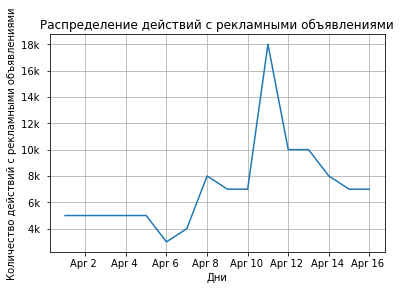

In [192]:
x = [int(d.split(sep='-')[2])for d in df_group.date]
y = [n//1000 for n in df_group.number]
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, y)
ax1.grid(True)
xlabels = []
ylabels = []
for i in (ax1.get_xticks()):
    xlabels.append('Apr %i ' % i) 
for i in(ax1.get_yticks()) :
    ylabels.append('%ik ' % i) 
ax1.set_yticklabels(ylabels)
ax1.set_xticklabels(xlabels)
ax1.set_title('Распрeделение действий с рекламными объявлениями')
ax1.set_xlabel('Дни')
ax1.set_ylabel('Количество действий с рекламными объявлениями')


## EDA

#### Рассмотрим отдельно  11 апреля

In [193]:
df_11 = df[df.date=='2019-04-11']
df_11.shape


(18259, 11)

<font color = 'midnightblue'> Отсортируем по времени

In [194]:
df_11.sort_values('time',inplace=True)
df_11.reset_index(drop=True,inplace=True)

In [195]:
df_11.head()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date,number
0,1.554941e+09,view,CPC,0,agency_33,client_99583,campaign_99643,ad_99643,web,2019-04-11,1
1,1.554941e+09,view,CPM,0,agency_158,client_106198,campaign_106664,ad_106668,android,2019-04-11,1
2,1.554941e+09,click,CPC,0,agency_54647,client_120417,campaign_120517,ad_120534,android,2019-04-11,1
3,1.554941e+09,view,CPC,0,no_agency,client_26,campaign_4096,ad_4096,android,2019-04-11,1
4,1.554941e+09,view,CPC,0,no_agency,client_2328,campaign_20614,ad_20615,android,2019-04-11,1


 <font color = 'midnightblue'> Создадим переменную дельта, чтобы посмотреть разницу во времени между двумя соседними действиями. Вдруг найдем какие-то выбросы.

In [196]:
df_11['time1']=0
df_11.time1[1:len(df_11)]=df_11.time[0:len(df_11)-1]
df_11.time1[0:1]=0

In [197]:
df_11['delta'] = df_11.time-df_11.time1
df_11.drop(['time1'],axis = 1,inplace=True)

In [198]:

df_11.head()


,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date,number,delta
0,1.554941e+09,view,CPC,0,agency_33,client_99583,campaign_99643,ad_99643,web,2019-04-11,1,1.554941e+09
1,1.554941e+09,view,CPM,0,agency_158,client_106198,campaign_106664,ad_106668,android,2019-04-11,1,5.000000e+00
2,1.554941e+09,click,CPC,0,agency_54647,client_120417,campaign_120517,ad_120534,android,2019-04-11,1,3.000000e+00
3,1.554941e+09,view,CPC,0,no_agency,client_26,campaign_4096,ad_4096,android,2019-04-11,1,2.200000e+01
4,1.554941e+09,view,CPC,0,no_agency,client_2328,campaign_20614,ad_20615,android,2019-04-11,1,7.000000e+00


<font color = 'midnightblue'> Переведем время в читаемый вид

In [199]:
df_11['time'] = pd.to_datetime(df_11['time'].astype(int),unit='s')
df_11['delta'] = pd.to_datetime(df_11['delta'].astype(int),unit='s')

In [200]:
df_11['time'] = df_11['time'].astype(str)
df_11.time = df_11.time.apply(lambda x: x.split()[1])


<font color = 'midnightblue'> Выберем только те наблюдения, у которых разница с предыдущим действием была <5 секунд

In [201]:
df_11['time'] = df_11['time'].astype(date)
df_11['delta'] = df_11['delta'].astype(str)
df_11.delta = df_11.delta.apply(lambda x: x.split()[1])
df_11_time = df_11[df_11.delta<'00:00:05']

In [202]:
df_11_time.reset_index(drop = True,inplace=True)

In [122]:
df_11_time.head()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date,number,delta
0,00:00:18,click,CPC,0,agency_54647,client_120417,campaign_120517,ad_120534,android,2019-04-11,1,00:00:03
1,00:00:56,click,CPM,0,agency_158,client_106937,campaign_107611,ad_107611,android,2019-04-11,1,00:00:03
2,00:01:55,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49560,iphone,2019-04-11,1,00:00:00
3,00:03:43,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49560,android,2019-04-11,1,00:00:02
4,00:03:46,view,CPC,0,agency_33,client_99583,campaign_99681,ad_101124,android,2019-04-11,1,00:00:03


<font color = 'midnightblue'> Сгрупируем по дате, чтобы посчитать количество действий

In [203]:
df_11_group = df_11_time.groupby('time').sum()
df_11_group['time']= df_11_group.index
df_11_group['ind']=range(0,len(df_11_group))
df_11_group.set_index('ind',inplace=True)

In [125]:
df_11_group.head()

,has_video,number,time
ind,,,
0,0,1,00:00:18
1,0,1,00:00:56
2,0,1,00:01:55
3,0,1,00:03:43
4,0,1,00:03:46


In [204]:
df_11_group.shape

(11249, 3)

In [205]:
from datetime import datetime

In [206]:
lst = [datetime.strptime(d, '%H:%M:%S').time() for d in df_11_group.time]

<font color = 'midnightblue'> Построим график числа действий за 11 апреля, только для тех событий, которые произошли с разницей меньше 5 секнуд

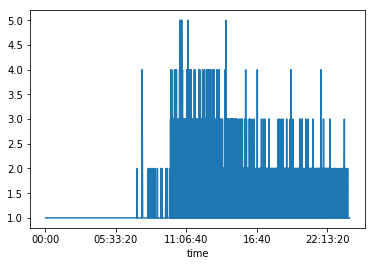

In [207]:

plt.plot(lst,df_11_group.number)

<font color = 'midnightblue'> Кое-где присутсвуют 5 различных действий за одну и ту же секунду, но учитывая  сколько человек пользуются Вконтакте, мне не кажется это странным. Выбросов нет.

<font color = 'midnightblue'> Рассмотрим ProfileReport, чтобы понять, как соотносятся разные категории признаков

In [208]:
pandas_profiling.ProfileReport(df_11)

Number of variables,12
Number of observations,18259
Total Missing (%),0.0%
Total size in memory,1.7 MiB
Average record size in memory,96.0 B
Numeric,0
Categorical,9
Boolean,1
Date,0
Text (Unique),0
Rejected,2


In [209]:
df_11[df_11.ad_id=='ad_49554'].nunique()

time                 8631
event                   3
ad_cost_type            1
has_video               1
agency_union_id         1
client_union_id         1
campaign_union_id       1
ad_id                   1
platform                4
date                    1
number                  1
delta                  37
dtype: int64

<font color = 'midnightblue'> Видим, что увеличения создала 1 рекламная компания от 1 агенства, с одним рекламным объявлением. Сравним его с другим соседним днем

In [210]:
df_10 = df[df.date=='2019-04-10']
df_10.shape

(7098, 11)

In [110]:
pandas_profiling.ProfileReport(df_10)

Number of variables,12
Number of observations,7098
Total Missing (%),0.0%
Total size in memory,665.5 KiB
Average record size in memory,96.0 B
Numeric,1
Categorical,8
Boolean,1
Date,0
Text (Unique),0
Rejected,2


<font color = 'midnightblue'> Все признаки данного рекламного объявления ниже в несколько раз. Теперь посмотрим как распределился event данной рекламы.

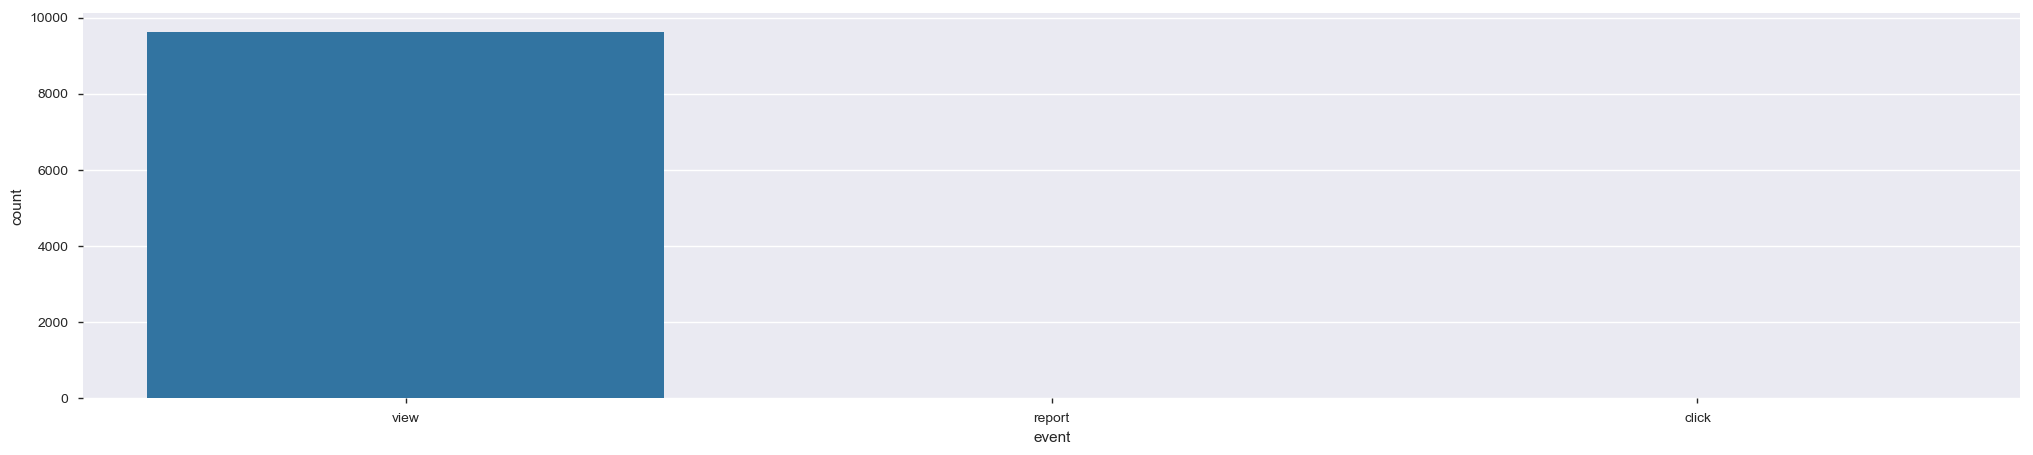

In [211]:
plt.figure(figsize=(25,5))
sns.countplot(x='event', data=df_11[df_11.ad_id=='ad_49554'])
plt.show()

In [212]:
df_11[df_11.ad_id=='ad_49554'].ad_cost_type.unique()

array(['CPC'], dtype=object)

<font color = 'midnightblue'> ~9500 тысяч смотрели рекламу, но почти никто не *кликал* на нее и отправлял report, но агенство платит только за клики, то есть размещать свою рекламу она может сколько угодно раз и возможно было по 2 одинаковых объявления на странице. Теперь посмотрим с какого дня данная реклама появилась в сети

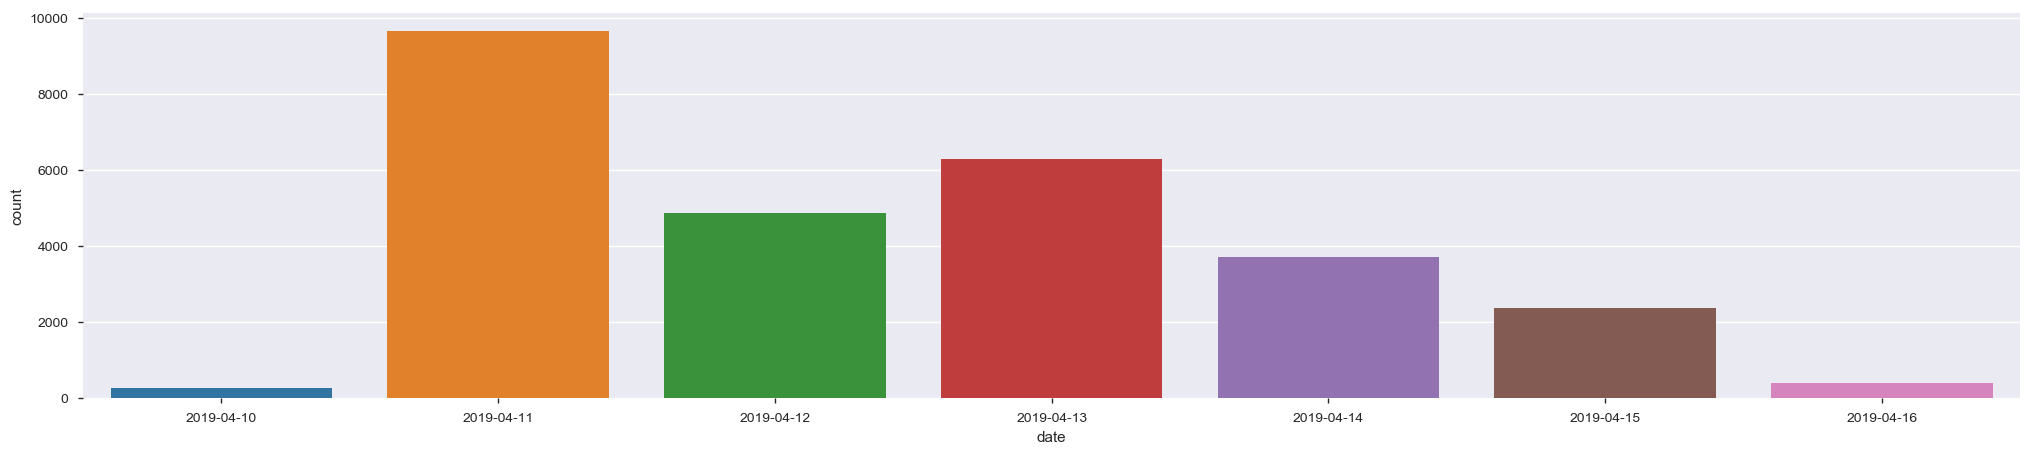

In [213]:
plt.figure(figsize=(25, 5))
sns.countplot(x='date', data=df[df.ad_id=='ad_49554'].sort_values('date'))
plt.show()

<font color = 'midnightblue'> То есть данная реклама появилась 10 апреля и была снята 16 апреля, пик пришелся на 11 апреля. Видим,что после 10 апреля график из пункта 1 стал выше. Возможно, это было реклама, приуроченная к дню космонавтики. Посмотрим, как распредлилилсь клики по дням

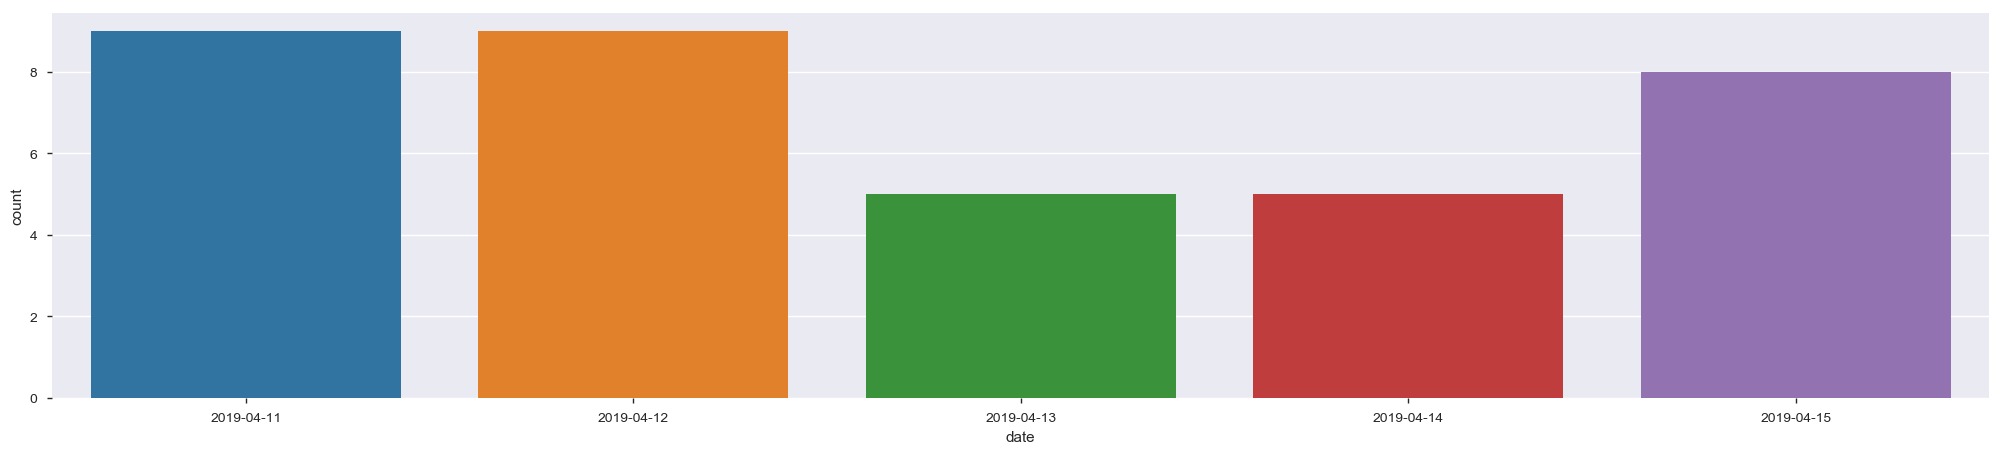

In [214]:
plt.figure(figsize=(25, 5))
sns.countplot(x='date', data=df[(df.ad_id=='ad_49554')&(df.event!='view')].sort_values('date'))
plt.show()

<font color = 'midnightblue'> Версия: реклама была приурочена ко дню Космонавтики, т.к. она началась с 10 апреля, главный пик пришелся на 11 апреля, перед
праздником, 12 и 13 числа она также продолжалась активно показываться, после чего пошла на спад,
также наибольшее количество кликов пришлось на 11 и 12 апреля.
Так как агенство платило только за клики на баннер, то размещало свою рекламу очень часто.

## Детектирование аномалий

<font color = 'midnightblue'> Можно посчитать отклонение от среднего больше чем на +-3 стандартных отклонения, если распределение является нормальным, но нормальным от не будет скорее всего никогда.
Можно зафиксировать какое то определенное значение, но оно может меняться в зависимости от дня.
Попробуем фиксировать все, что не попопадает в диапазон [(x25 -1.5*(x75-x25));(x75+1.5*(x75-x25))]


In [215]:
df_group.number.head()


ind
0    5172
1    5269
2    5357
3    5108
4    5305
Name: number, dtype: int64

<font color = 'midnightblue'> Считаем 25 и 75 персентили

In [216]:
x25 = stats.scoreatpercentile(df_group.number, 25)
x75 = stats.scoreatpercentile(df_group.number, 75)

In [217]:
rbound = x75+1.5*(x75-x25)

<font color = 'midnightblue'>  Оставляем только те, что превысили
правую границу, их можно назвать аномалиями, на которые нужно 
обратить внимание

In [218]:
df_group[df_group.number>rbound]

,time,has_video,number,date
ind,,,,
10,2.839263e+13,32,18259,2019-04-11
